In [1186]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [1187]:
df1 = pd.read_csv('iris.csv')

In [1188]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [1189]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [1190]:
get_info_dataframe(df1)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None 

DATAFRAME MISSING INFO - 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

DATAFRAME SHAPE INFO - 

(150, 6)


In [1191]:
df1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [1192]:
df1['Species'] = df1['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [1193]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [1194]:
df1.drop(['Id'],axis=1,inplace=True)

In [1195]:
X = df1.drop(["Species"],axis=1).values
y = df1["Species"].values

In [1196]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [1197]:
scaler = StandardScaler()

In [1198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [1199]:
X_train

array([[6.2, 2.8, 4.8, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.9, 3.6, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3. , 4.5, 1.5],
       [5.8, 4. , 1.2, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.1, 3. , 4.6, 1.4],
       [5.5, 2.3, 4. , 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [5. , 2.3, 3.3, 1. ],
       [4.8, 3.4, 1.6, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.1, 3.5, 1.4, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [6.2, 3.4, 5.4, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [5.4, 3.4, 1.7, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.3, 3.4, 5.6, 2.4],
       [7.6, 3. , 6.6, 2.1],
       [6. , 2.2, 5. , 1.5],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.8, 4.1, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [7.7, 3

In [1200]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train

In [1201]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [1202]:
hiden_dim = 4

class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,hiden_dim)
        # self.hidden_layer1  = nn.Linear(10, 3)
        self.output_layer   = nn.Linear(hiden_dim,output_dim)
        # self.relu = nn.ReLU()
        # self.square = torch.square()
    
    
    def forward(self,x):
        out =  torch.square(self.input_layer(x))
        out =  torch.square(self.output_layer(out))
        # out =  torch.square(self.input_layer(x))
        # out =  self.output_layer(out)
        # out =  self.relu(self.hidden_layer1(out))
        return out

In [1203]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica
input_dim  = 4 
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)

In [1204]:
# creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [1205]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [1206]:
num_epochs = 500
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [1207]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/500, Train Loss: 0.7939, Test Loss: 0.7382
Epoch 100/500, Train Loss: 0.5014, Test Loss: 0.4351
Epoch 150/500, Train Loss: 0.1589, Test Loss: 0.1284
Epoch 200/500, Train Loss: 0.0891, Test Loss: 0.0693
Epoch 250/500, Train Loss: 0.0713, Test Loss: 0.0613
Epoch 300/500, Train Loss: 0.0650, Test Loss: 0.0583
Epoch 350/500, Train Loss: 0.0617, Test Loss: 0.0561
Epoch 400/500, Train Loss: 0.0595, Test Loss: 0.0543
Epoch 450/500, Train Loss: 0.0578, Test Loss: 0.0524
Epoch 500/500, Train Loss: 0.0564, Test Loss: 0.0502


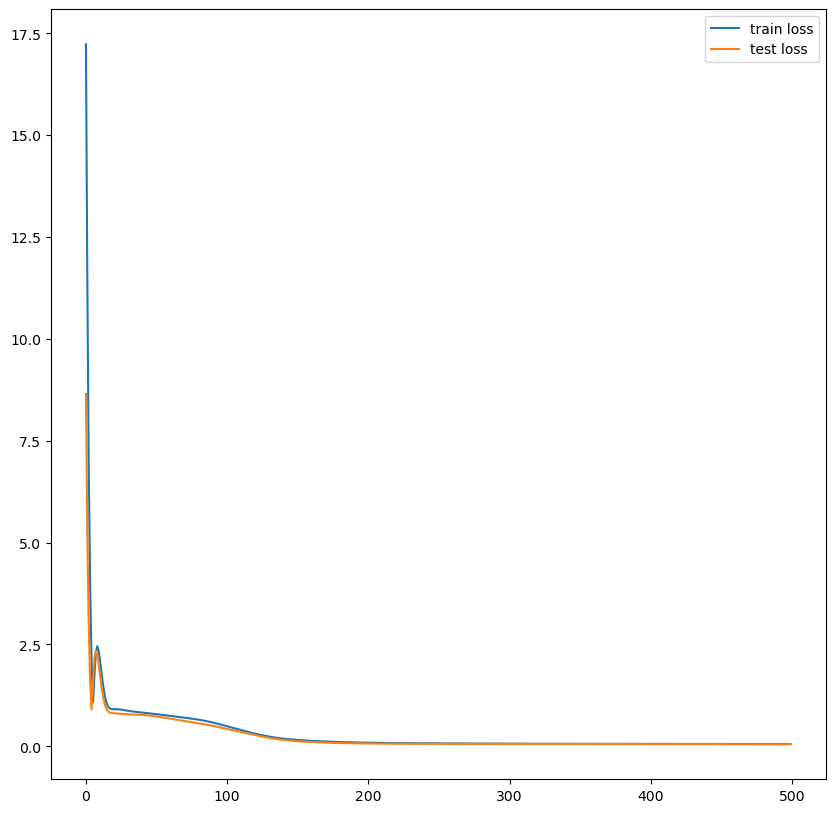

In [1208]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [1209]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [1219]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [1220]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [1212]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 97.5
Test Accuracy: 96.667


In [1213]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0318,  0.2851,  0.2565,  0.1056],
         [-0.2608, -0.4952,  0.3909, -0.0119],
         [ 0.1541, -0.2142,  0.1155,  0.4807],
         [-0.3556, -0.1284, -0.2050,  0.3253]], requires_grad=True),
 Parameter containing:
 tensor([-0.5876, -0.3275,  0.1980, -0.2002], requires_grad=True),
 Parameter containing:
 tensor([[-0.2292,  0.5691, -0.3443,  0.2108],
         [-0.4891,  0.1091, -0.0361,  0.4562],
         [-0.2930,  0.4473, -0.5045, -0.2072]], requires_grad=True),
 Parameter containing:
 tensor([-0.3478,  0.0924, -0.1877], requires_grad=True)]

In [1214]:
# Get the model parameters
params = model.state_dict()

# Convert the parameter tensors into numpy arrays
param_arrays = []

# Save each parameter tensor to a separate CSV file
for key in params:
    param_array = params[key].cpu().numpy()
    np.savetxt(key+'.csv', param_array, delimiter=',', fmt="%.5f")

In [1215]:
df = pd.DataFrame(X_test.numpy())

# Save DataFrame to CSV
df.to_csv('X_test.csv', index=False, header=False)